Importing Libraries

In [1]:
import os
import gc
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 140)
from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression as log
# from sklearn.model_selection import train_test_split as split 
# from sklearn.model_selection import GridSearchCV as Grid
# from sklearn.naive_bayes import GaussianNB as GNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LinearRegression as linear
# import xgboost as xgb
# from sklearn.decomposition import IncrementalPCA as ipca
# from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score,
#                              confusion_matrix, accuracy_score, roc_curve, auc)

mpl.rcParams[u'font.sans-serif'] = u'SimHei'
mpl.rcParams[u'axes.unicode_minus'] = False


Loading Data

In [2]:
bpath = os.path.join("..","nocode","fin")
trainfile = os.path.join(bpath,"train.csv")
df = pd.read_csv(trainfile, header=0, encoding="utf8")

In [3]:
#saving the original dataset length
org_len = len(df)
df.head(2)

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1         -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -0.002484        NaN        NaN  -0.989982   -1.055090         NaN   
1   0.138212        NaN        NaN  -0.151877   -0.384952         NaN   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0         NaN   -2.667671   -2.001475   -1.703595   -2.196892         NaN   
1         NaN    1.225838    0.789076    1.110580    1.102281         NaN   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0         NaN    1.483295    1.307466         NaN         NaN    1.175200   
1         NaN   -0.590600   -0.625682         NaN         NaN   -0.543425   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0    0.967805     1.60841    1.319365         NaN         NaN   -0.515073   
1   -0.547486    -0.70660   -0.667806         NaN         NaN    0.910558   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0   -0.448988         NaN         NaN   -2.429812   -2.206423   -3.593120   
1    0.914465         NaN         NaN    2.137454    2.080459    2.819291   

   feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
0   -2.868358    0.112697    0.053157   -0.539956   -0.692187    3.491282   
1    2.483965   -0.086755   -0.082687    0.368431    0.469196    5.711996   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0   -1.684889    1.337123   -0.328607    1.689207   -1.052243   -1.870885   
1   -2.215132    0.796703   -1.140081    0.716617   -0.059431   -0.198920   

   feature_48  feature_49  feature_50  feature_51  feature_52  feature_53  \
0   -1.789342   -1.574173   -1.120820   -0.571920   -1.093033    0.703515   
1   -0.326697   -0.381770    1.435607    3.401393    2.486748   -2.014598   

   feature_54  feature_55  feature_56  feature_57  feature_58  feature_59  \
0    5.936281         NaN    3.315812    1.291338    2.468825    2.490069   
1   -0.390588         NaN   -0.027262   -1.886927   -1.706450   -0.888236   

   feature_60  feature_61  feature_62  feature_63  feature_64  feature_65  \
0   -1.148239   -0.961935   -2.263944   -2.158765   -5.012022   -2.006825   
1   -1.138294   -0.954461   -1.350633   -1.459546   -4.564815   -2.651966   

   feature_66  feature_67  feature_68  feature_69  feature_70  feature_71  \
0   -1.284090   -2.141697   -2.054935   -1.851203   -1.431184   -1.634481   
1   -1.620014   -2.240625   -2.147273   -0.255224    3.202946   -0.535872   

   feature_72  feature_73  feature_74  feature_75  feature_76  feature_77  \
0         NaN   -0.373934         NaN    0.559241    0.891368     0.27170   
1         NaN   -0.050948         NaN    0.141089    0.058363     0.13119   

   feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  \
0         NaN   -1.521125         NaN    3.045337    3.260512    0.683558   
1         NaN   -0.121239         NaN    0.677553    0.045842   -0.124616   

   feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  \
0         NaN   -0.109194         NaN    0.488806    1.447504   -2.790902   
1         NaN   -0.007004         NaN   -0.410491   -0.024323   -3.012654   

   feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  \
0         NaN    1.158770         NaN    3.754522    7.137163   -1.863069   
1         NaN    1.157671         NaN    1.297679    1.281956   -2.427595   

   feature_96  feature_97  feature_98  feature_99  feature_100  feature_101  \
0         NaN    0.434466

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 214.7 KB


Trying to cut corners to save some memory

In [5]:
df.feature_0 = df.feature_0.astype(np.int8)
df.date= df.date.astype(np.int16)
df.ts_id = df.ts_id.astype(np.int32)

In [6]:
for i in df:
    if df[i].dtype == np.float64:
        # 列值近似于0 的数量 占比 大于 千分之一 的列名
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) > .001:
            print(i)
df.info()

weight
resp_1
resp_2
resp_3
resp
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Columns: 138 entries, date to ts_id
dtypes: float64(135), int16(1), int32(1), int8(1)
memory usage: 211.4 KB


In [7]:
for i in df:
    if df[i].dtype == np.float64:
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) < .001:
            df[i] = df[i].astype(np.float32)
            gc.collect()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Columns: 138 entries, date to ts_id
dtypes: float32(130), float64(5), int16(1), int32(1), int8(1)
memory usage: 110.3 KB


#### 确保数据按日期存储

In [8]:
df.sort_values(by= ['date','ts_id'],inplace=True)

Adding target

In [9]:
df['action'] = np.where(df['resp'] > 0,1,0)
df.action = df.action.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Columns: 139 entries, date to action
dtypes: category(1), float32(130), float64(5), int16(1), int32(1), int8(1)
memory usage: 112.0 KB


## EDA  
### 一般的数据分析
#### 收益分析

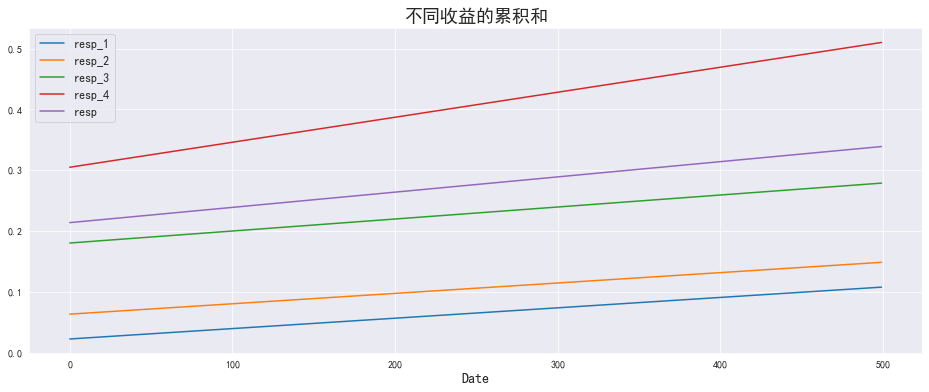

In [10]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].sum().cumsum().plot(ax=ax)
plt.title('不同收益的累积和',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.legend(fontsize=12);

#### 前 100 天收益更好,  resp_4 累计最好， resp_1 累计最差。
#### 每个 收益 的均值

In [11]:
fig = px.line(df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4','resp']].mean(),
              x= df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4','resp']].mean().index,
              y= ['resp_1', 'resp_2', 'resp_3', 'resp_4','resp'],
              title= '\n每天的平均收益')
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = '平均收益'
fig.show()

#### 收益分位数 均值方差峰度

Text(0.5, 0.92, 'RESPs Historgrams on Different Scales')

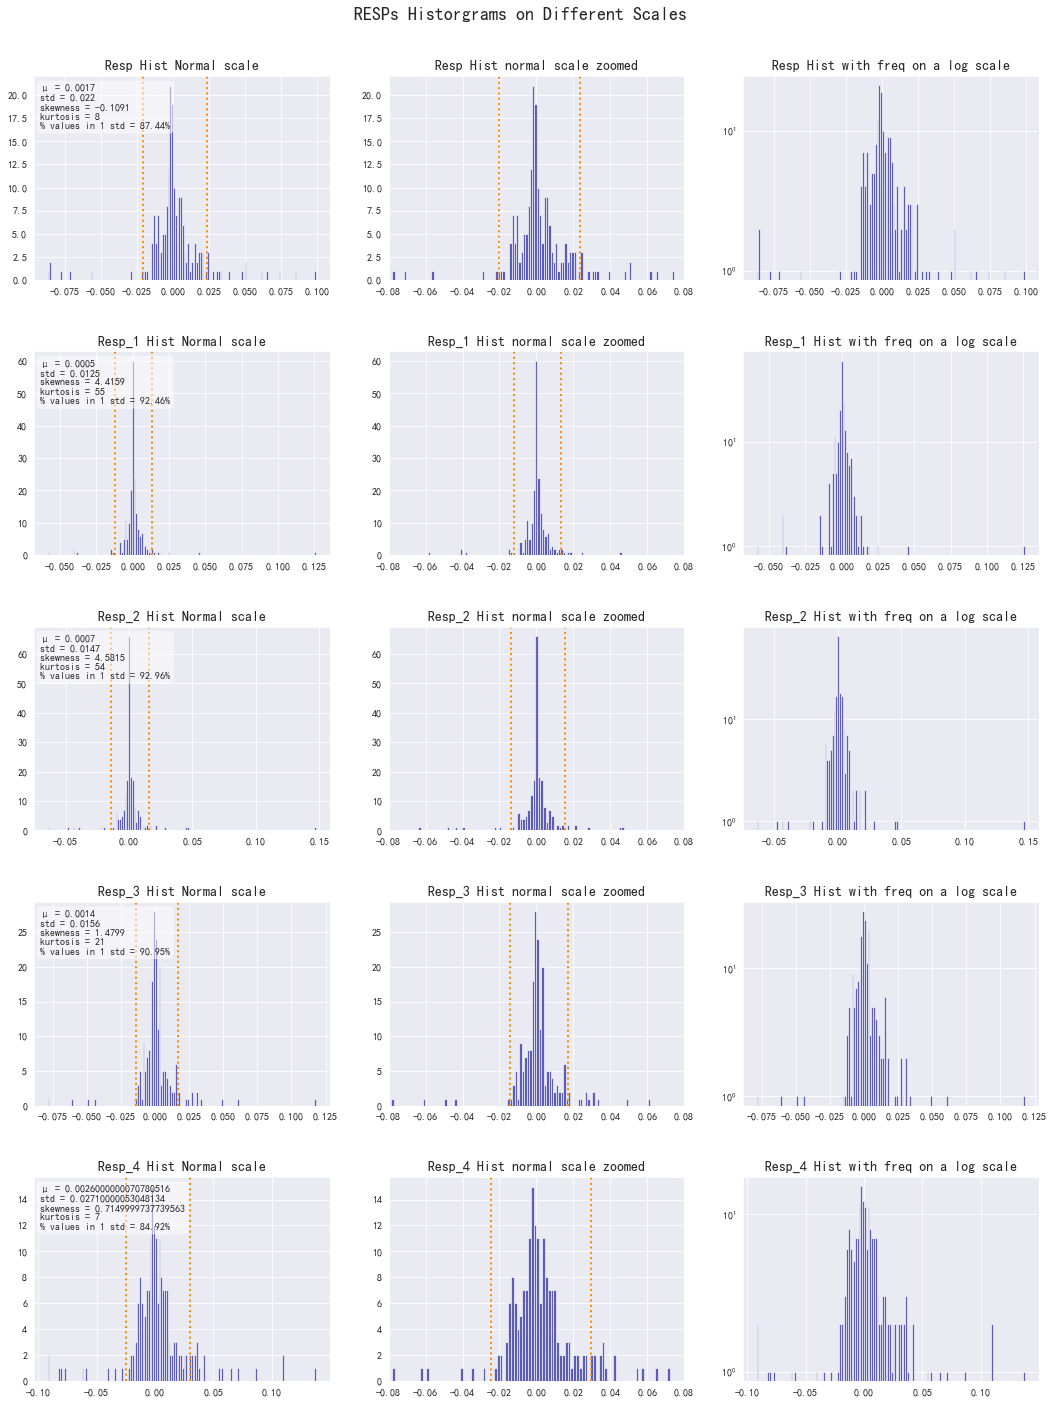

In [12]:
fig,((ax11,ax12,ax13),(ax21,ax22,ax23),(ax31,ax32,ax33),(ax41,ax42,ax43),(ax51,ax52,ax53)) = plt.subplots(5,3,figsize=(18,24))
plt.subplots_adjust(hspace=0.35)
ax11.hist(df.resp,bins=150, color='darkblue',alpha=.6)
ax11.axvline(df.resp.mean()+df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
ax11.axvline(df.resp.mean()-df.resp.std(),color='darkorange',linestyle=':',linewidth=2)

df.resp.plot.hist(bins= 150,ax=ax12,color='darkblue',alpha=.6)
ax12.axvline(df.resp.mean()+df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
ax12.axvline(df.resp.mean()-df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
ax12.set_xlim(-.08,.08)

ax13.hist(df.resp,bins=150, color='darkblue',alpha=.6)
ax13.set_yscale('log')
skew= round(df.resp.skew(),4)
kurt= round(df.resp.kurtosis())
std1= round((((df.resp.mean()-df.resp.std()) < df.resp ) & (df.resp < (df.resp.mean()+df.resp.std()))).mean()*100,2)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax11.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp.mean(),4),round(df.resp.std(),4),skew,kurt,std1),
         transform=ax11.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax11.set_title('Resp Hist Normal scale',fontsize=14)
ax12.set_title('Resp Hist normal scale zoomed',fontsize=14)
ax13.set_title('Resp Hist with freq on a log scale',fontsize=14);
ax11.set_xlabel('')
ax11.set_ylabel('')
ax12.set_xlabel('')
ax12.set_ylabel('')
ax13.set_xlabel('')
ax13.set_ylabel('')

ax21.hist(df.resp_1,bins=150,color='darkblue',alpha=.6)
ax21.axvline(df.resp_1.mean()+df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
ax21.axvline(df.resp_1.mean()-df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_1.plot.hist(bins= 150,ax=ax22,color='darkblue',alpha=.6)
ax22.axvline(df.resp_1.mean()+df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
ax22.axvline(df.resp_1.mean()-df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
ax22.set_xlim(-.08,.08)
ax23.hist(df.resp_1,bins=150,color='darkblue',alpha=.6)
ax23.set_yscale('log')
skew= round(df.resp_1.skew(),4)
kurt= round(df.resp_1.kurtosis())
std1= round((((df.resp_1.mean()-df.resp_1.std()) < df.resp_1 ) & (df.resp_1 < (df.resp_1.mean()+df.resp_1.std()))).mean()*100,2)
ax21.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_1.mean(),4),round(df.resp_1.std(),4),skew,kurt,std1),
         transform=ax21.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax21.set_title('Resp_1 Hist Normal scale',fontsize=14)
ax22.set_title('Resp_1 Hist normal scale zoomed',fontsize=14)
ax23.set_title('Resp_1 Hist with freq on a log scale',fontsize=14);
ax21.set_xlabel('')
ax21.set_ylabel('')
ax22.set_xlabel('')
ax22.set_ylabel('')
ax23.set_xlabel('')
ax23.set_ylabel('')

ax31.hist(df.resp_2,bins=150,color='darkblue',alpha=.6)
ax31.axvline(df.resp_2.mean()+df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
ax31.axvline(df.resp_2.mean()-df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_2.plot.hist(bins= 150,ax=ax32,color='darkblue',alpha=.6)
ax32.axvline(df.resp_2.mean()+df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
ax32.axvline(df.resp_2.mean()-df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
ax32.set_xlim(-.08,.08)
ax33.hist(df.resp_2,bins=150, color='darkblue',alpha=.6)
ax33.set_yscale('log')
skew= round(df.resp_2.skew(),4)
kurt= round(df.resp_2.kurtosis())
std1= round((((df.resp_2.mean()-df.resp_2.std()) < df.resp_2 ) & (df.resp_2 < (df.resp_2.mean()+df.resp_2.std()))).mean()*100,2)
ax31.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_2.mean(),4),round(df.resp_2.std(),4),skew,kurt,std1),
         transform=ax31.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax31.set_title('Resp_2 Hist Normal scale',fontsize=14)
ax32.set_title('Resp_2 Hist normal scale zoomed',fontsize=14)
ax33.set_title('Resp_2 Hist with freq on a log scale',fontsize=14);
ax31.set_xlabel('')
ax31.set_ylabel('')
ax32.set_xlabel('')
ax32.set_ylabel('')
ax33.set_xlabel('')
ax33.set_ylabel('')

ax41.hist(df.resp_3, color='darkblue',alpha=.6,bins=150)
ax41.axvline(df.resp_3.mean()+df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
ax41.axvline(df.resp_3.mean()-df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_3.plot.hist(bins=150, color='darkblue',alpha=.6,ax=ax42)
ax42.axvline(df.resp_3.mean()+df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
ax42.axvline(df.resp_3.mean()-df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
ax42.set_xlim(-.08,.08)
ax43.hist(df.resp_3, color='darkblue',alpha=.6,bins=150)
ax43.set_yscale('log')
skew= round(df.resp_3.skew(),4)
kurt= round(df.resp_3.kurtosis())
std1= round((((df.resp_3.mean()-df.resp_3.std()) < df.resp_3 ) & (df.resp_3 < (df.resp_3.mean()+df.resp_3.std()))).mean()*100,2)
ax41.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_3.mean(),4),round(df.resp_3.std(),4),skew,kurt,std1),
         transform=ax41.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax41.set_title('Resp_3 Hist Normal scale',fontsize=14)
ax42.set_title('Resp_3 Hist normal scale zoomed',fontsize=14)
ax43.set_title('Resp_3 Hist with freq on a log scale',fontsize=14);
ax41.set_xlabel('')
ax41.set_ylabel('')
ax42.set_xlabel('')
ax42.set_ylabel('')
ax43.set_xlabel('')
ax43.set_ylabel('')

ax51.hist(df.resp_4,bins=150, color='darkblue',alpha=.6)
ax51.axvline(df.resp_4.mean()+df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
ax51.axvline(df.resp_4.mean()-df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_4.plot.hist(bins= 150,color='darkblue',alpha=.6,ax=ax52)
ax52.axvline(df.resp_4.mean()+df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
ax52.axvline(df.resp_4.mean()-df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
ax52.set_xlim(-.08,.08)
ax53.hist(df.resp_4,bins=150,color='darkblue',alpha=.6)
ax53.set_yscale('log')
skew= round(df.resp_4.skew(),4)
kurt= round(df.resp_4.kurtosis())
std1= round((((df.resp_4.mean()-df.resp_4.std()) < df.resp_4 ) & (df.resp_4 < (df.resp_4.mean()+df.resp_4.std()))).mean()*100,2)
ax51.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_4.mean(),4),round(df.resp_4.std(),4),skew,kurt,std1),
         transform=ax51.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax51.set_title('Resp_4 Hist Normal scale',fontsize=14)
ax52.set_title('Resp_4 Hist normal scale zoomed',fontsize=14)
ax53.set_title('Resp_4 Hist with freq on a log scale',fontsize=14)
ax51.set_xlabel('')
ax51.set_ylabel('')
ax52.set_xlabel('')
ax52.set_ylabel('')
ax53.set_xlabel('')
ax53.set_ylabel('')

fig.suptitle('RESPs Historgrams on Different Scales',fontsize=18,y=.92)

#### 不同 周期收益 的相关性
##### 可以看到对角线上是各个属性的直方图（分布图），而非对角线上是两个不同属性之间的相关图，

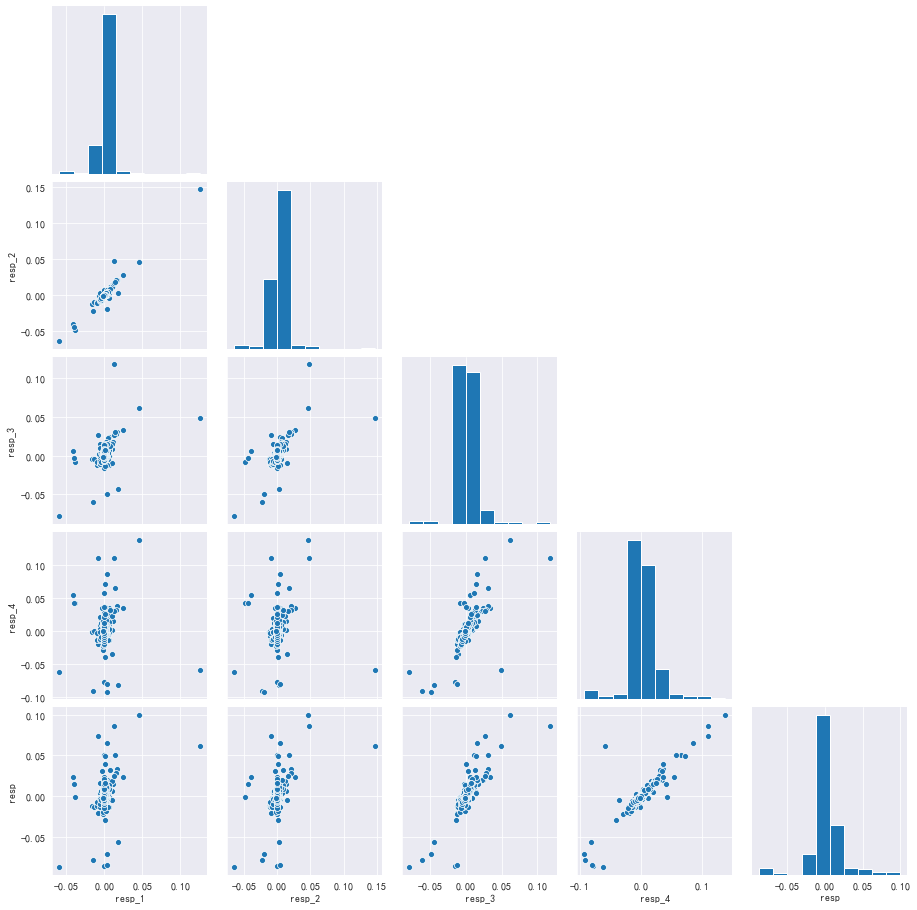

In [13]:
sns.pairplot(df[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']],corner=True)

##### Resp ， Resp_4 高相关。 Resp_1 ， Resp_2高相关。之前的 标准差分布 显示 Resp 跟长期高风险更相关。
### 投资基础知识
##### 高风险股票，低风险债券。长期可以高风险 组合方式，短期低风险模式。 
### 日期 
##### 查看天数

In [14]:
df.date.unique()

array([  0, 499], dtype=int16)

### 交易日 每年 252 : 253 天
https://en.wikipedia.org/wiki/Trading_day
### 查看 每天的 收益量 和 次数

In [15]:
fig = px.area(data_frame= df.groupby('date')[['resp']].count(),title='每天交易数')
fig.update_traces( showlegend = False)
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = '交易次数'
fig.show()

In [16]:
fig = px.area(data_frame= df.groupby('date')[['resp']].sum(),title='每日收益和')
fig.update_traces( showlegend = False)
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = '收益和'
fig.show()

### 收益有波动
#### 20天的移动标准差

In [17]:
date_df = df.groupby('date')[['resp']].mean()
std20 = []
for i in range(len(date_df)):
    if i <20:
        std20.append(np.nan)
    else:
        moving_std = date_df['resp'][i-20:i].std()
        std20.append(moving_std)
date_df['moving_std'] = std20
date_df.tail(2)

resp  moving_std
date                      
0     0.002160         NaN
499   0.001251         NaN

In [18]:
fig = px.line(data_frame=date_df,y=['resp','moving_std'],title='收益 & 每天 20次交易的移动标准差 平均收益')
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = '平均收益'
fig.show()

### 每天收益的 标准差， 标准差 的 Kernel Density Estimation kde 核密度估计

Text(0.5, 1.0, '每个交易日的 收益的标准差')

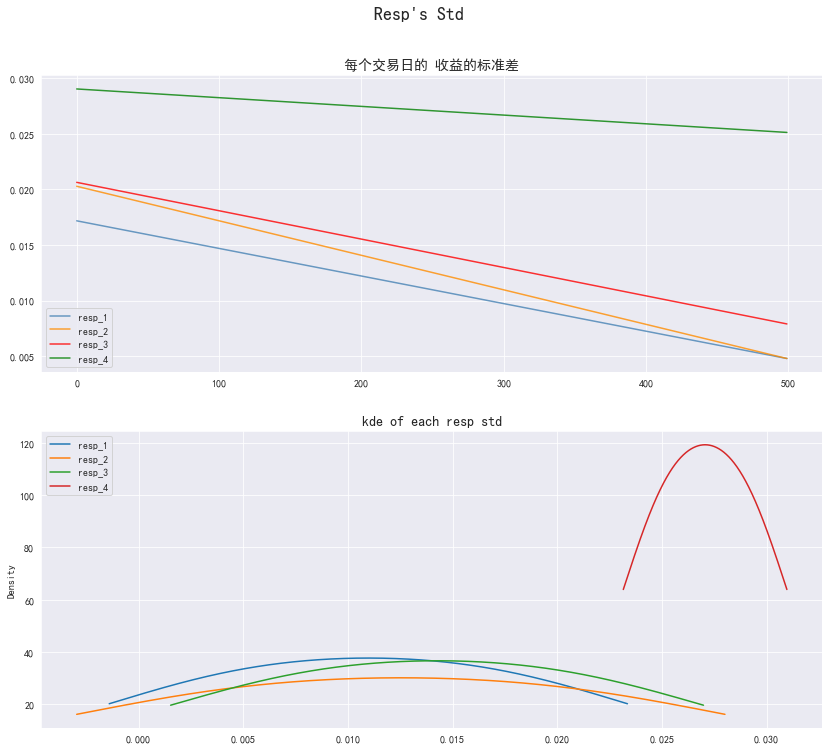

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,12))
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4']].std().plot(ax=ax1,color=['steelblue','darkorange','red','green'],alpha=.8)
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4']].std().plot.kde(ax=ax2)
fig.suptitle('Resp\'s Std',fontsize=18,y=.96)
ax2.set_xlabel('')
ax1.set_xlabel('')
ax2.set_title('kde of each resp std', fontsize=14)
ax1.set_title('每个交易日的 收益的标准差',fontsize=14)

#### 收益的标注差 随收益周期的增加 而增加
#### 标准差前 100天有些高, 80天后模型改善。
### 权重

Text(0.5, 0, '')

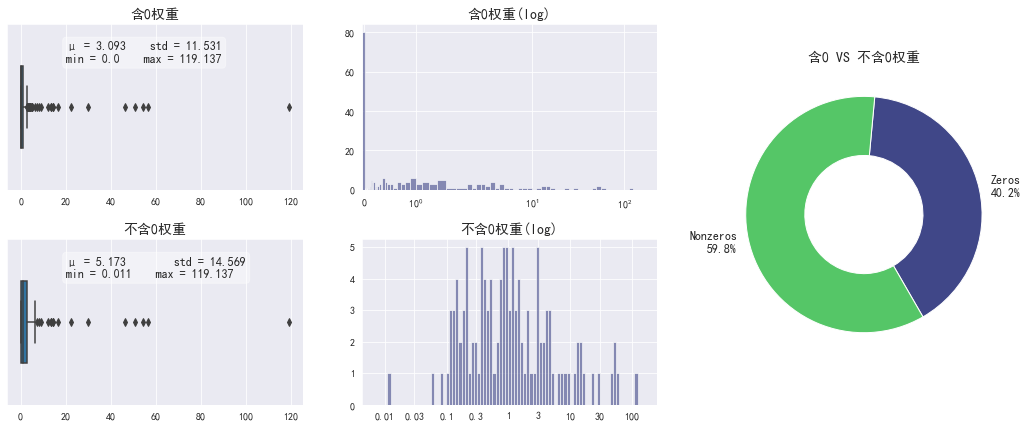

In [20]:
fig = plt.figure(figsize=(18,7))
grid =  gridspec.GridSpec(2,3,figure=fig,hspace=.3,wspace=.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[:, 2])
sns.boxplot(x = df.weight,width=.5,ax=ax1)
ax2.hist(df.weight, color='#404788ff',alpha=.6, bins= list([-.05] + list(10**np.arange(-2,2.24,.05))))
ax2.set_xscale('symlog')
ax2.set_xlim(-.05,227)
sns.boxplot(x = df.weight[df.weight != 0],width=.5,ax=ax3)
ax1.set_title('含0权重',fontsize=14)
ax3.set_title('不含0权重',fontsize=14)
ax2.set_title('含0权重(log)',fontsize=14)
ax4.set_title('不含0权重(log)',fontsize=14)
props = dict(boxstyle='round', facecolor='white', alpha=0.4)
ax1.text(.2,.9,'μ = {}    std = {}\nmin = {}    max = {}'.format(round(df.weight.mean(),3),round(df.weight.std(),3),round(df.weight.min(),3),round(df.weight.max(),3)),
         transform=ax1.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax3.text(.2,.9,'μ = {}        std = {}\nmin = {}    max = {}'.format(round(df.weight[df.weight != 0].mean(),3),round(df.weight[df.weight != 0].std(),3),
                                                              round(df.weight[df.weight != 0].min(),3),round(df.weight[df.weight != 0].max(),3)),
         transform=ax3.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax4.hist(df.weight[df.weight !=0],color='#404788ff',alpha=.6,bins=10**np.arange(-2.16,2.24,.05))
ax4.set_xscale('log')
ax4.set_xticks((.01,.03,.1,.3,1,3,10,30,100))
ax4.set_xticklabels((.01,.03,.1,.3,1,3,10,30,100))
ax5.pie(((df.weight==0).mean(),(1-(df.weight==0).mean())),startangle=300,wedgeprops=dict(width=0.5),
        labels=('Zeros\n{}%'.format(round((df.weight==0).mean()*100,2)),'Nonzeros\n{}%'.format(round((1-(df.weight==0).mean())*100,2))),
        textprops={'fontsize': 12},colors=['#404788ff','#55c667ff'])
ax5.set_title('含0 VS 不含0权重',fontsize=14)
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax2.set_ylabel('')
ax5.set_ylabel('')
ax4.set_xlabel('')

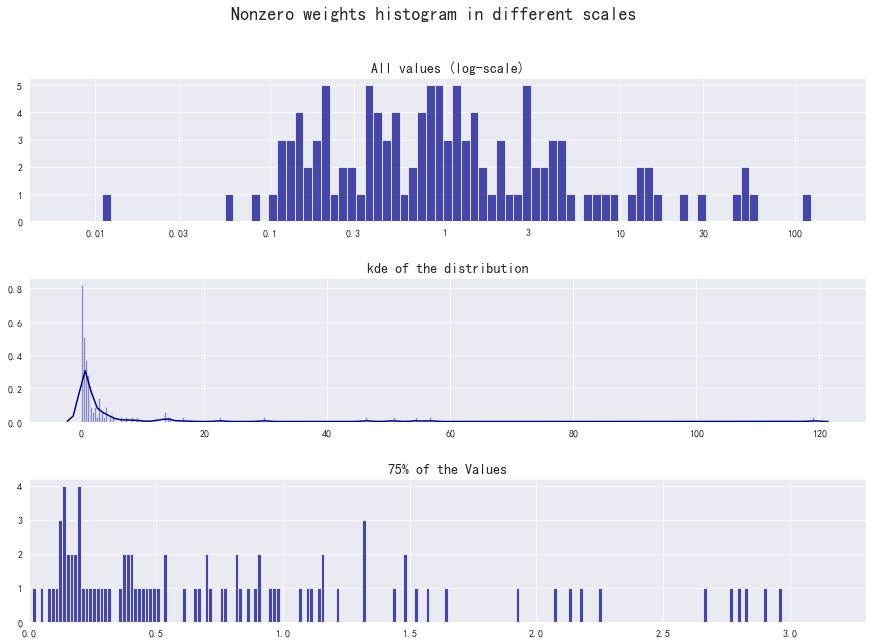

In [21]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Nonzero weights histogram in different scales',fontsize=18)
ax1 = plt.subplot(3,1,1)
ax1.hist(df.weight[df.weight !=0],color='darkblue',alpha=.7, bins=10**np.arange(-2.16,2.23,.05))
plt.xscale('log')
plt.xticks((.01,.03,.1,.3,1,3,10,30,100),(.01,.03,.1,.3,1,3,10,30,100))
ax2 = plt.subplot(3,1,2)
sns.distplot(df.weight[df.weight != 0], color='darkblue', bins=400, ax=ax2) 
ax3 = plt.subplot(3,1,3)
ax3.hist(df.weight[(df.weight !=0) & (df.weight < 3.197 )],color='darkblue',alpha=.7, bins=200)
ax3.set_xlim(0,3.3)
ax2.set_xlabel('') 
ax1.set_title('All values (log-scale)',fontsize=14)
ax2.set_title('kde of the distribution',fontsize=14)
ax3.set_title('75% of the Values',fontsize=14)
plt.subplots_adjust(hspace=.4)

### 探查 离群点

Text(0.5, 0, '')

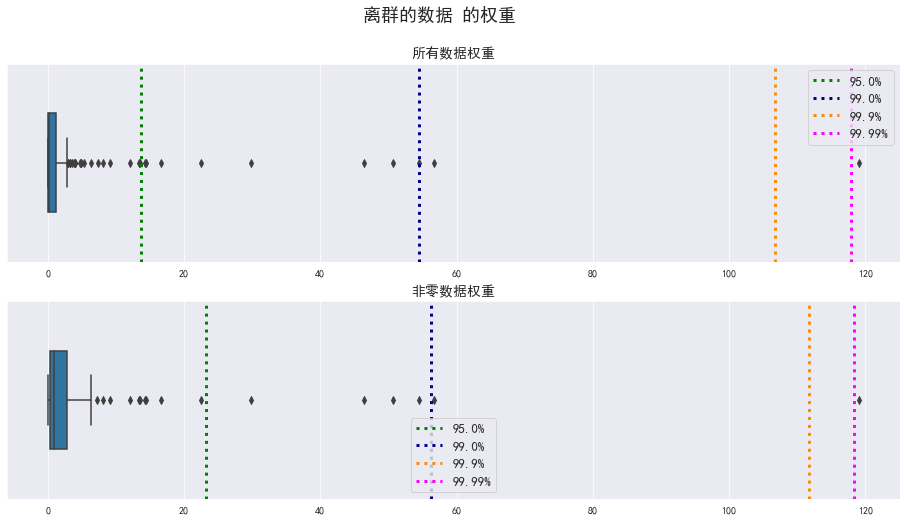

In [22]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,8))
fig.suptitle('离群的数据 的权重',fontsize=18)
sns.boxplot(df.weight,width=.5, ax=ax1)
ax1.axvline(np.percentile(df.weight,95), color= 'green',label='95.0%',linestyle=':',linewidth=3)
ax1.axvline(np.percentile(df.weight,99), color= 'darkblue',label='99.0%',linestyle=':',linewidth=3)
ax1.axvline(np.percentile(df.weight,99.9), color= 'darkorange',label='99.9%',linestyle=':',linewidth=3)
ax1.axvline(np.percentile(df.weight,99.99), color= 'magenta',label='99.99%',linestyle=':',linewidth=3)
ax1.legend(fontsize=13)
sns.boxplot(df.weight[df.weight !=0],width=.5, ax=ax2)
ax2.axvline(np.percentile(df.weight[df.weight !=0],95), color= 'green',label='95.0%',linestyle=':',linewidth=3)
ax2.axvline(np.percentile(df.weight[df.weight !=0],99), color= 'darkblue',label='99.0%',linestyle=':',linewidth=3)
ax2.axvline(np.percentile(df.weight[df.weight !=0],99.9), color= 'darkorange',label='99.9%',linestyle=':',linewidth=3)
ax2.axvline(np.percentile(df.weight[df.weight !=0],99.99), color= 'magenta',label='99.99%',linestyle=':',linewidth=3)
ax2.legend(fontsize=13)
ax1.set_title('所有数据权重', fontsize= 14)
ax2.set_title('非零数据权重', fontsize= 14)
ax1.set_xlabel('')
ax2.set_xlabel('')

Text(0.5, 1.0, '收益 vs 权重\n相关系数=-0.0453')

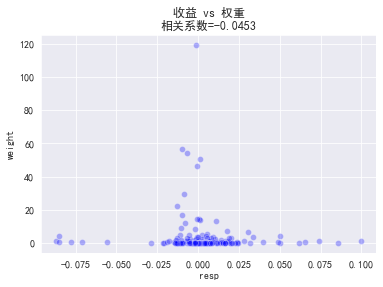

In [23]:
sns.scatterplot(data=df, x='resp',y='weight', color= 'blue', alpha=.3)
plt.title('收益 vs 权重\n相关系数={}'.format(round(df.weight.corr(df.resp),4)))

#### 权重 收益 非线性相关。但高权重低收益。
### 特征 的 数据分析
#### 加载特征的csv

In [24]:
df_f = pd.read_csv(os.path.join(bpath,"features.csv"))
df_f.head(5)

feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0  feature_0  False  False  False  False  False  False  False  False  False   
1  feature_1  False  False  False  False  False  False   True   True  False   
2  feature_2  False  False  False  False  False  False   True   True  False   
3  feature_3  False  False  False  False  False  False   True  False   True   
4  feature_4  False  False  False  False  False  False   True  False   True   

   tag_9  tag_10  tag_11  tag_12  tag_13  tag_14  tag_15  tag_16  tag_17  \
0  False   False   False   False   False   False   False   False   False   
1  False   False   False   False   False   False   False   False   False   
2   True   False   False   False   False   False   False   False   False   
3  False   False   False   False   False   False   False   False   False   
4   True   False   False   False   False   False   False   False   False   

   tag_18  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  tag_26  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   tag_27  tag_28  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False

In [25]:
fig = px.bar(df_f.set_index('feature').T.sum(), title='每个特征的标签数')
fig.layout.xaxis.tickangle = 300
fig.update_traces( showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

### 查看空值

In [26]:
fig = px.bar(x = df.isnull().sum().index,y= df.isnull().sum().values,title= '查看空值')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.yaxis. dtick = 100000
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.layout.xaxis.showgrid = True
fig.show()

### 特征空值 超过10 %的 特证名

In [27]:
nulls = df.isnull().sum()
nulls_list = list(nulls[nulls >(0.1 * len(df))].index)
nulls_list

['feature_7',
 'feature_8',
 'feature_11',
 'feature_12',
 'feature_17',
 'feature_18',
 'feature_21',
 'feature_22',
 'feature_27',
 'feature_28',
 'feature_31',
 'feature_32',
 'feature_55',
 'feature_72',
 'feature_74',
 'feature_78',
 'feature_80',
 'feature_84',
 'feature_86',
 'feature_90',
 'feature_92',
 'feature_96',
 'feature_98',
 'feature_102',
 'feature_104',
 'feature_108',
 'feature_110',
 'feature_114',
 'feature_116',
 'feature_120',
 'feature_121']

##### 查看空值间的相关性

In [28]:
df[['resp','resp_1','resp_2','resp_3','resp_4','weight']+nulls_list].corr().style.background_gradient(cmap='coolwarm')

#### 空值超过10% 且跟收益的相关性不强，删除掉

In [29]:
df.drop(columns=nulls_list,inplace=True)

#### 剩下的空值的标准差系数

In [30]:
(df.iloc[:,7:-2].std() / df.iloc[:,7:-2].mean()).head(5)

feature_0    13.262289
feature_1   -25.862135
feature_2    -4.863763
feature_3   -18.950919
feature_4   -61.443484
dtype: float64

#### 因为值在零附近，标准差系数不相关
### 俯瞰特征分布

array([[<AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>],
       [<AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_9'}>],
       [<AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>],
       [<AxesSubplot:title={'center':'feature_16'}>,
        <AxesSubplot:title={'center':'feature_19'}>,
        <AxesSubplot:title={'center':'feature_20'}>,
        <AxesSubplot:title={'center':'feature_23'}>],
       [<AxesSubplot:title={'center':'feature_24'}>,
        <AxesSubplot:title={'center':'feature_25'}>,
        <AxesSubplot:title={'center':'feature_26'}

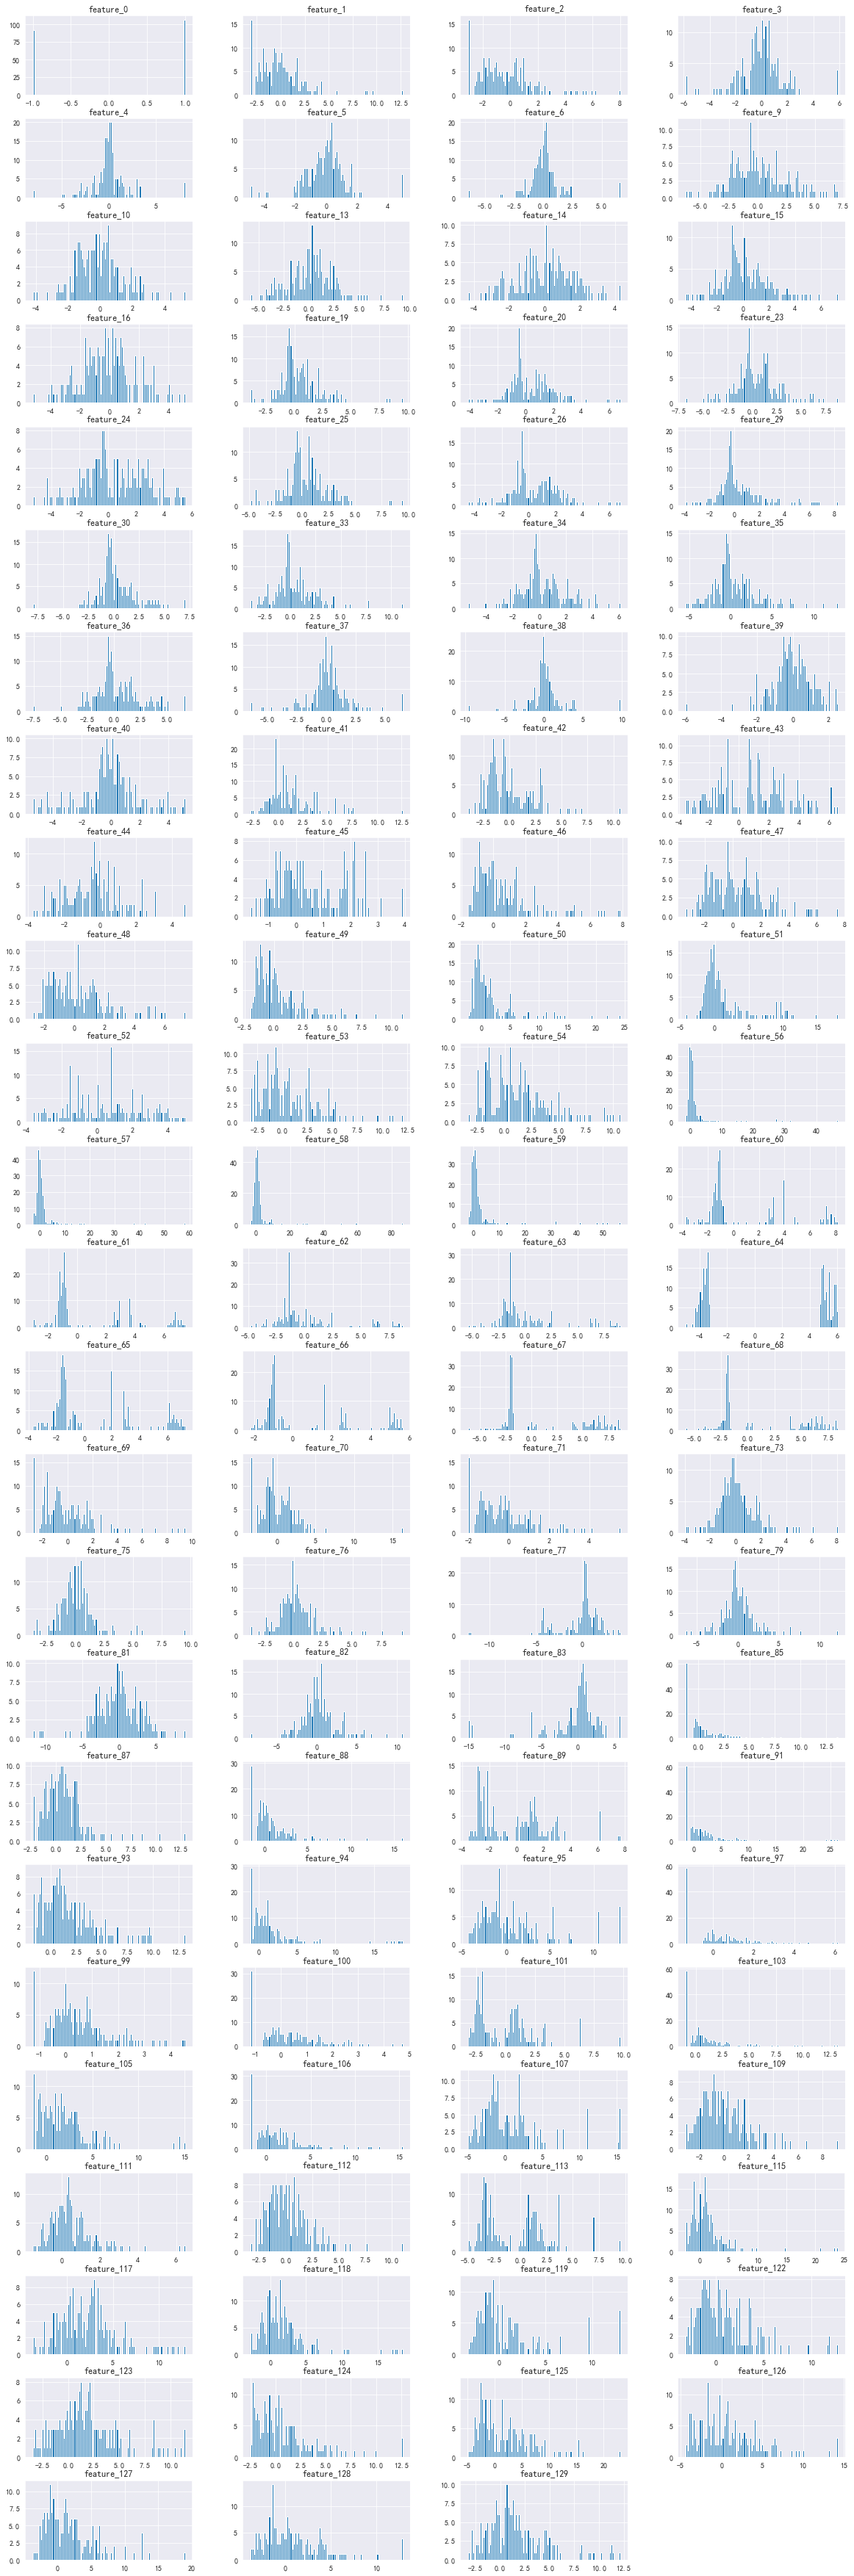

In [31]:
df.iloc[:,7:-2].hist(bins=100,figsize=(20,74),layout=(29,4))

#####  均值的水平盒子格点 ，深入理解t特征分布。
##### 由于非常中心化，用 0.1%:99.9% 标记极端值。

IndexError: list index out of range

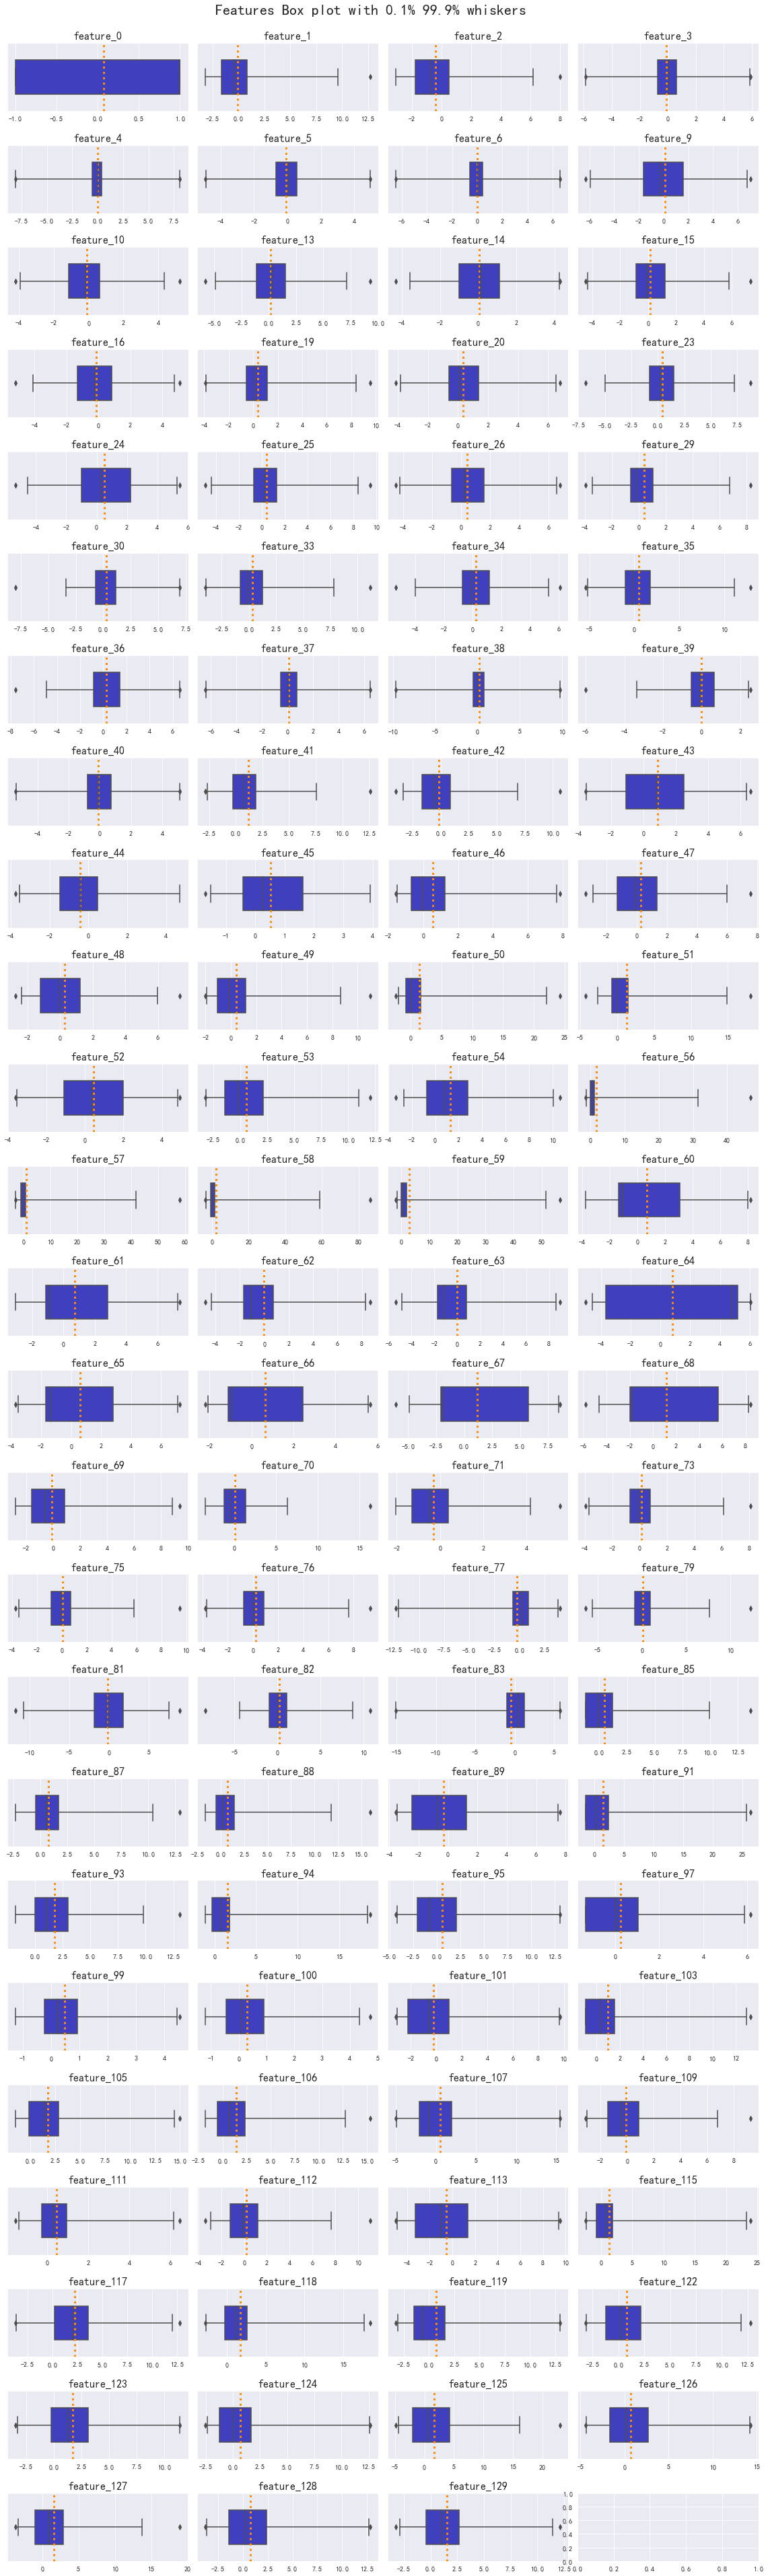

In [32]:
fig = plt.figure(figsize=(20,80))
fig.suptitle('Features Box plot with 0.1% 99.9% whiskers',fontsize=22, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
featstr = [i for i in df.columns[7:-2]]
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= df[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9))
        subf.axvline(df[featstr[counter]].mean(),color= 'darkorange', label='Mean', linestyle=':',linewidth=3)
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        counter += 1
        gc.collect()
plt.show()

#### 大量的离群点影响分布
#### 由于非常中心化，空值用中心点代替.

In [ ]:
df.fillna(df.mean(axis=0),inplace=True)

### 特征成长变化

In [ ]:
df.groupby('date')[featstr].mean().cumsum().plot(layout=(29,4),subplots=True,figsize=(20,82),xlabel='')
fig = plt.gcf()
fig.text(0.5, 0.19, 'Date',ha='center', fontsize = 24)
fig.suptitle('每天特征均值的积分',fontsize=24,y=.886)

##### 许多线性增长的，有些线性下降，有些震荡。
#### 特征的相关性

In [ ]:
corr = df.iloc[:,7:-2].corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

#### 特征相关的热图

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(corr,ax= ax, cmap='coolwarm')

#### 许多组相关的，有些割裂了组相关


In [ ]:
featstr2 = [ i for i in featstr if i not in ['feature_41','feature_64']]
len(featstr)

In [ ]:
fig = plt.figure(figsize=(22,44))
grid =  gridspec.GridSpec(12,5,figure=fig,hspace=.5,wspace=.2)
counter = 1
for i in range(12):
    for j in range(5):
        if counter == 113:
            break
        subf = fig.add_subplot(grid[i, j]);
        sns.scatterplot(x= df[featstr2[counter]], y = df[featstr2[counter+1]], ax= subf);
        cor = round(df[featstr2[counter]].corr(df[featstr2[counter+1]]) * 100,2)
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{} & {}\nCorrelation = {}%'.format(featstr2[counter],featstr2[counter+1],cor),fontsize=14)
        counter += 2
        gc.collect()

#### 列出高度组相关的特征
#### 从: [feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_29] 开始，因为组相关性强。

In [ ]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df[featstr2[15:23]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False)

In [ ]:
sns.pairplot(df[featstr2[15:23]],corner=True)

#### 虽然相关系数很强，但非完全线性，受离群点影响.
### 再次检查和其他组的相关性

In [ ]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df[featstr2[23:31]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False)

In [ ]:
sns.pairplot(df[featstr2[23:31]],corner=True)

#### 跟其他组类似，负相关性很强.

In [ ]:
plt.figure(figsize=(18,6)) 
sns.heatmap(df[featstr2[15:31]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False)

### 离群点
####  特征的 均值

In [ ]:
fig = px.bar(df[featstr].mean(), title='特征均值')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

In [ ]:
fig = px.bar(df[featstr].max(), title='特征最大值')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

In [ ]:
fig = px.bar(df[featstr].min(), title='特征最小值')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

In [ ]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(10,12))
plt.subplots_adjust(hspace=.3)
sns.distplot(df[featstr].max(),ax= ax1 )
sns.distplot(df[featstr].min(),ax= ax2)
sns.distplot(df[featstr].mean(),ax= ax3)
fig.suptitle('最大值，均值，最小值 的分布',fontsize=16)
ax1.set_title('最大值 的分布',fontsize=14)
ax1.text(.82,.56,'std = {}'.format(round(df[featstr].max().std(),2)),transform=ax1.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax2.set_title('最小值 的分布',fontsize=14)
ax2.text(.82,.56,'std = {}'.format(round(df[featstr].min().std(),2)),transform=ax2.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax3.set_title('均值 的分布',fontsize=14)
ax3.text(.82,.56,'std = {}'.format(round(df[featstr].mean().std(),2)),transform=ax3.transAxes, verticalalignment='top',bbox=props,fontsize=12)

### 统计性的展示离群点

In [ ]:
for i in featstr[1:]:
    print('{}\n0.1%:99.9% are between: {}\nmax: {}\nmin: {}\n75% are under: {}'.format(i,np.percentile(df[i],(.1,99.9)), df[i].max(),df[i].min(),np.percentile(df[i],75)),
         '\n===============================')

In [ ]:
df[(df.feature_56== df.feature_56.max())|(df.feature_57== df.feature_57.max())|(df.feature_58== df.feature_58.max()) | (df.feature_59== df.feature_59.max())]

##### 可以推出数据集的 极端离群点 跟邻列  高度多线性相关。
#### 大胆删除超过99.9%的离群数据
##### 为了避免在循环数据集时删除更多的数据，我们将为每一个特性制作一个99.9%标记的列表，我们还将创建一个负异常值列表“使用.1%标记”，以便稍后研究。

In [ ]:
n999 = [ np.percentile(df[i],99.9) for i in featstr[1:]]
n001 = [ np.percentile(df[i],.1) for i in featstr[1:]]

In [ ]:
for i, j in enumerate(featstr[1:]):
    df = df[df[j] < n999[i]]
    gc.collect()

In [ ]:
str(round(((org_len - len(df))/org_len)*100,2))+'%'

In [ ]:
fig = px.bar(df[featstr].max(), title='特征最大值')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

### 订制 一个盒子格点图  1% : 99.9% 范围.

In [ ]:
fig = plt.figure(figsize=(20,80))
fig.suptitle('特征盒子图 0.1% 99.9% ',fontsize=22, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= df[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        counter += 1
        gc.collect()

#### 数据集仍然有许多特别是负值的异常值，因为只去除了正的，所以具有对称异常值的特征有一些左偏异常值。
#### 比较两个箱线图（移除正异常值之前和之后），我们可以注意到从特征_3到特征_40的特征，过去具有对称的异常值，现在在修剪后变为具有极端负异常值
### 手动修剪这些特征的异常值


In [ ]:
for i,j in zip(featstr[1:][2:34],n001[2:34]):
    df = df[df[i] > j]
    gc.collect()

#### 下面的代码显示了到目前为止由于清理而丢失的观察值的比率

In [ ]:
str(round(((org_len - len(df))/org_len)*100,2))+'%'

#### 剔除异常值, 并考虑 收益 特征的kde和直方图

In [ ]:
fig = plt.figure(figsize=(20,80))
fig.suptitle('KDE plot of Features',fontsize=24,transform =fig.transFigure, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.01)
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.distplot(df[df.action==0][featstr[counter]],bins= 100,label='Negative',
                     color='darkorange', kde_kws={'linewidth':4},ax=subf)
        sns.distplot(df[df.action!=0][featstr[counter]],bins= 100,label='Positive',
                     color='blue', kde_kws={'alpha':.9,'linewidth':2},hist_kws={'alpha':.3},ax=subf)
        subf.axvline(np.percentile(df[featstr[counter]],99.5),color= 'darkblue', label='99.5%', linestyle=':',linewidth=2)
        subf.axvline(np.percentile(df[featstr[counter]],.5),color= 'red', label='0.5%', linestyle=':',linewidth=2)
        subf.legend().set_visible(False)
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        kurt=round(df[featstr[counter]].kurt(),2)
        skew=round(df[featstr[counter]].skew(),2)
        subf.text(.6,.92,'Kurt = {:.2f}\nSkew = {:.2f}'.format(kurt ,skew),
         transform=subf.transAxes, verticalalignment='top',bbox=props,fontsize=10)
        counter += 1
        gc.collect()
handles, labels = subf.get_legend_handles_labels()
fig.legend(handles, labels,ncol=4, bbox_to_anchor=(0.86, 0.893),fontsize=10,
           title= 'Resp',title_fontsize=14,bbox_transform =fig.transFigure)

#### 通过将 收益列 添加到features，
##### 特征的直方图现在有更少的离群值和更正式的分布。
##### 一些特征，有许多负异常值。一些特性，有许多正异常值。
##### 特征分布不受 收益的影响。
#### 特征与收益相关性
##### 首先，我们制作了一个相关的pandas列，以确定resp和每个特征之间的关系

In [ ]:
respcorr =  pd.Series([ df.resp.corr(df[i]) for i in featstr],index=featstr)

In [ ]:
fig = px.bar(respcorr,color = respcorr, color_continuous_scale=['red','blue'], title= '特征 收益的相关性')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = '皮尔逊 相关性'
fig.update(layout_coloraxis_showscale=False)
fig.show()

#### 我们可以看到特征与s收益之间并没有真正的关联
### 特征和权重
#### 再做一系列与特征相关的权重，但只考虑了大于0的权重

In [ ]:
wecorr = pd.Series([df[df.weight != 0].weight.corr(df[df.weight != 0][i]) for i in featstr],index=featstr)

In [ ]:
wecorr.head(10)

In [ ]:
fig = px.bar(wecorr,title= '特征 权重 的相关性 (未包含0权重)')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = '皮尔逊 相关性'
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(showlegend=False)
fig.show()

#### 用散点图来探索最大和最低的相关系数
#### 从属于特征51的最高相关性开始

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(df[df.weight != 0].weight,df[df.weight != 0].feature_51, color = 'darkblue', alpha=.3)
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Featre_51',fontsize=14)
plt.title('Feature_51 vs 权重\n相关性 = {}%'.format(round(df[df.weight != 0].weight.corr(df[df.weight != 0].feature_51),4)*100),fontsize=16)

#### 用散点图来探索最大和最低的相关系数
### 从属于特征51的最高相关性开始，权重与特征51高度相关
#### 检查最低相关系数


In [ ]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(df[df.weight != 0].weight,df[df.weight != 0].feature_126, color = 'darkblue', alpha=.3)
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Featre_126',fontsize=14)
plt.title('Feature_126 vs 权重\n相关性{}%'.format(round(df[df.weight != 0].weight.corr(df[df.weight != 0].feature_126),4)*100),fontsize=16)

#### 权重与特征126之间存在某种负相关，较弱
### 查找特征0的唯一值

In [ ]:
plt.figure(figsize=(7,5)) 
df.feature_0.value_counts().plot.bar(color='darkblue',alpha=.6,width=.5)
plt.title('Feature_0',fontsize=18) 
plt.xticks(rotation=0,fontsize=14)

#### Feature_0似乎是某种二进制特性
### 考虑收益值

In [ ]:
plt.figure(figsize=(8,6)) 
sns.countplot(data=df, x='feature_0', hue='action',palette='viridis')
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('Feature 0',fontsize=12)
plt.title('Feature 0 and Resp', fontsize=18)
plt.ylabel('')
plt.xlim(-1,2)
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h,['Negative','Positive'],ncol=1, fontsize=12, loc=3,title= 'Resp',title_fontsize=14)

#### 特征0和收益没有明显的相关性
### PCA & 聚类

In [ ]:
scaler = scale()

In [ ]:
scaler.fit(df[featstr[1:]])

In [ ]:
df_pca = pd.DataFrame(scaler.transform(df[featstr[1:]]))
df_pca.columns = featstr[1:]
df_pca.head()

#### 减少数据维度到14维

In [ ]:
pca =  PCA(n_components=14).fit(df_pca)

In [ ]:
df_pca = pd.DataFrame(pca.transform(df_pca))

In [ ]:
pcs = ['pc'+str(i+1) for i in range(14)]

##### 增加 权重 收益 行为 列

In [33]:
df_pca.columns = pcs
df_pca['action'] = df.action.values
df_pca['weight'] = df.weight.values
df_pca['resp'] = df.resp.values
df_pca.head()

NameError: name 'pcs' is not defined

#### 探索PCA的配对图

In [34]:
sns.pairplot(data= df_pca,vars=pcs,hue='action')

NameError: name 'df_pca' is not defined

#### PCA的主成分不能有效的跟收益相关
### 聚类
#### PCA下的聚类

In [ ]:
kmeans = k_means(n_clusters= 4, max_iter= 400, random_state= 0,X=df_pca[pcs])

In [ ]:
df_pca['cluster'] = kmeans[1]
df_pca['cluster'] = df_pca['cluster'].astype('category')
df_pca.head(8)

#### 聚类和收益的相关性

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
sns.countplot(data=df_pca,x='cluster',hue='action',ax=ax,palette='viridis')
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h,['Negative','Positive'],ncol=1, fontsize=12, loc=2,title= 'Resp',title_fontsize=14)
plt.xlim(-1,4)
plt.xlabel('Clusters',fontsize=16)
plt.ylabel('')
plt.title('PCA Clusters and Resp', fontsize=18)

#### 依然看不出相关性